In [1]:
import numpy as np
import matplotlib.pyplot as plt

config = {
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.edgecolor': '.4',
    'axes.labelcolor': '.0',
    'axes.titlesize': 'medium',
    'axes.labelsize': 'xx-large',
    'figure.autolayout': True,
    'figure.figsize': (7, 7),
    'font.size': 10.0,
    'grid.linestyle': '--',
    'legend.facecolor': '.9',
    'legend.frameon': True,
    'legend.fontsize': 'x-large',
    'savefig.transparent': True,
    'text.color': '.0',
    'xtick.labelsize': 'large',
    'ytick.labelsize': 'large',
}

plt.style.use([config])

d_y = lambda x, y: x**(-2) - y/x - y**2
x_0 = 1.0
x_f = 2.0
y_0 = -1.0
h = 0.1

In [2]:
def euler_aperfeicoado(d_y, x: float, x_f: float, y: float, h: float):
    ''' Método de Euler Aperfeiçoado '''
    f = [y]
    while x < x_f:
        k_1 = d_y(x, y)
        k_2 = d_y(x + h, y + h * k_1)
        
        y = y + (h/2) * (k_1 + k_2)
        f.append(y)
        
        x = x + h
    return f


def runge_kutta_4(d_y, x: float, x_f: float, y: float, h: float):
    ''' Método de Runge-Kutta de 4ª ordem '''
    f = [y]
    while x < x_f:
        k_1 = d_y(x, y)
        k_2 = d_y(x + h/2, y + (h/2) * k_1)
        k_3 = d_y(x + h/2, y + (h/2) * k_2)
        k_4 = d_y(x + h, y + h * k_3)
        
        y = y + (h/6) * (k_1 + 2*k_2 + 2*k_3 + k_4)
        f.append(y)
        
        x = x + h
    return f

In [3]:
f_a = euler_aperfeicoado(d_y, x_0, x_f, y_0, h)
f_b = runge_kutta_4(d_y, x_0, x_f, y_0, h)

print("Euler Aperfeiçoado")
for y in f_a :
    print(f"{y:.4f}")

print("\nRunge-Kutta de 4ª ordem")
for y in f_b :
    print(f"{y:.4f}")

Euler Aperfeiçoado
-1.0000
-0.9083
-0.8319
-0.7672
-0.7118
-0.6638
-0.6218
-0.5847
-0.5517
-0.5222
-0.4956

Runge-Kutta de 4ª ordem
-1.0000
-0.9091
-0.8333
-0.7692
-0.7143
-0.6667
-0.6250
-0.5882
-0.5556
-0.5263
-0.5000


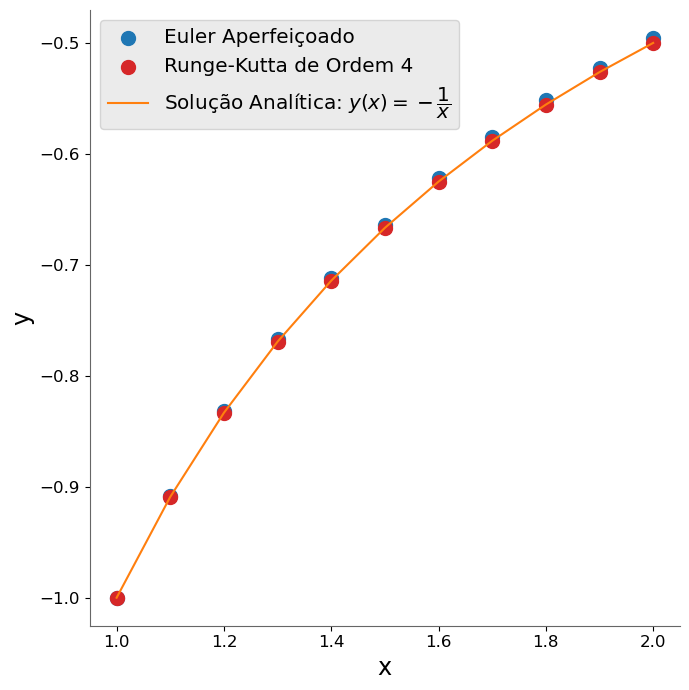

In [4]:
x = np.linspace(x_0, x_f, int((x_f - x_0) / h) + 1)
sol = -1/x

legend_a = "Euler Aperfeiçoado"
legend_b = "Runge-Kutta de Ordem 4"
legend_sol = rf"Solução Analítica: $y(x) = -\dfrac{{1}}{{x}}$"

# Plot dos resultados e da solução analítica
plt.scatter(x, f_a, label=legend_a, color="tab:blue", s=100)
plt.scatter(x, f_b, label=legend_b, color="tab:red", s=100)
plt.plot(x, sol, label=legend_sol, color="tab:orange")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [10]:
from scipy.integrate import odeint

d_P = lambda P, t, a, b: a * P - b * P**2

P_0 = 76.1
a = 0.02
b = 4e-5
t = np.linspace(0, 80, 9)

# Solução numérica
P_n = odeint(d_P, P_0, t, args=(a, b))

# Solução analítica
P_t = (89.7617 * np.exp(0.02*t))/(1 + 0.1795 * np.exp(0.02*t))

for i in range(len(t)):
    print(f"t = {t[i]:.4f}:\tP_n = {P_n[i][0]:.4f}\tP_t = {P_t[i]:.4f}")

t = 0.0000:	P_n = 76.1000	P_t = 76.1015
t = 10.0000:	P_n = 89.9187	P_t = 89.9208
t = 20.0000:	P_n = 105.6215	P_t = 105.6244
t = 30.0000:	P_n = 123.2424	P_t = 123.2463
t = 40.0000:	P_n = 142.7389	P_t = 142.7442
t = 50.0000:	P_n = 163.9775	P_t = 163.9844
t = 60.0000:	P_n = 186.7244	P_t = 186.7335
t = 70.0000:	P_n = 210.6488	P_t = 210.6603
t = 80.0000:	P_n = 235.3357	P_t = 235.3501


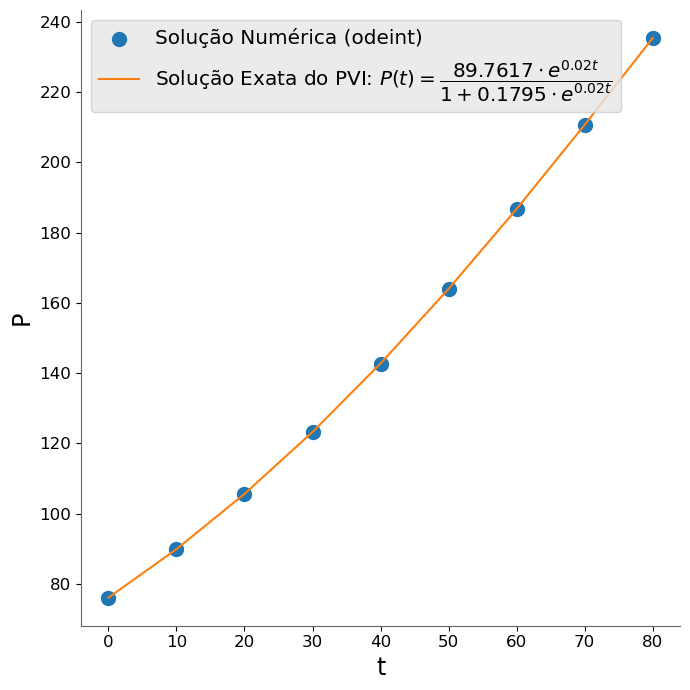

In [6]:
legend_n = "Solução Numérica (odeint)"
legend_t = rf"Solução Exata do PVI: $P(t) = \dfrac{{89.7617 \cdot e^{{0.02t}}}}{{1 + 0.1795 \cdot e^{{0.02t}}}}$"
plt.scatter(t, P_n, label=legend_n, color="tab:blue", s=100)
plt.plot(t, P_t, label=legend_t, color="tab:orange")
plt.xlabel('t')
plt.ylabel('P')
plt.legend()
plt.show()